# <font color = "#03BFB5">  Health Insurance Premium Prediction.

### <font color = "#8c0aff"> Importing the required libraries

In [20]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### <font color = '#8c0aff'> Processing the dataset and bilding the tarining the models

In [21]:
# Load and preprocess data
data = pd.read_csv("Health Insurance-Dataset.csv")
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['region'] = data['region'].map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

# Split data into features and target
X = data.drop(['charges'], axis=1)
y = data['charges']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Gradient Boosting Regression model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

# Make predictions on test data
lr_y_pred = lr_model.predict(X_test)
gbr_y_pred = gbr_model.predict(X_test)

<font color = #3975d4> Here the dataset is used to train two models 1.Linear regression model 2. Gradient descent model and both the model's performances were compared to determine the best model for the dataset we have.

Linear Regression MSE: 34204243.68
Gradient Boosting Regression MSE: 19898762.09

Linear Regression R²: 0.79
Gradient Boosting Regression R²: 0.88


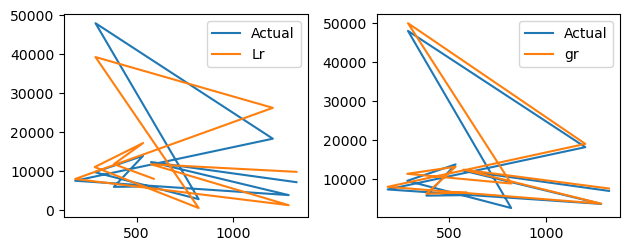

In [23]:
# Calculate mean squared error for both models
lr_mse = mean_squared_error(y_test, lr_y_pred)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Gradient Boosting Regression MSE: {gbr_mse:.2f}")

# Calculate R² for both models
lr_r2 = r2_score(y_test, lr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)

print(f"\nLinear Regression R²: {lr_r2:.2f}")
print(f"Gradient Boosting Regression R²: {gbr_r2:.2f}")


# Visualize the model's performances
y_pred1 = lr_model.predict(X_test)
y_pred2 = gbr_model.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'gr':y_pred2})

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()
plt.legend()

<font color = #3975d4> On comparing the two model's performances based onn th evalues of the MSE and r2 we can see that the Gradient descent method best fits this data and further the Plots of the prediction by two models also proves that.
<font color = #eb0c15> Hence we use the Gradient descent model to predict the insurance Premium for a new customer.

In [10]:
# Get user input
age = int(input("Enter your age: "))
sex = int(input("Enter your gender (Male - 1/Female - 0): "))
bmi = float(input("Enter your BMI value: "))
children = int(input("Enter the number of children: "))
smoker = int(input("Smoker - 1 / Non Smoker - 0 (1/0): "))
region = int(input("Enter your region [1-southwest1, 2-southeast, 3-northwest, 4-northeast]: "))

# Create DataFrame for new customer
new_customer = pd.DataFrame({'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]})

# Make prediction for new customer
prediction = gbr_model.predict(new_customer)
print(f"Predicted insurance cost for new customer: {prediction[0]:.2f}")

Enter your age: 30
Enter your gender (Male - 1/Female - 0): 1
Enter your BMI value: 26
Enter the number of children: 2
Smoker - 1 / Non Smoker - 0 (1/0): 0
Enter your region [1-southwest1, 2-southeast, 3-northwest, 4-northeast]: 1
Predicted insurance cost for new customer: 5682.24
